<a href="https://colab.research.google.com/github/MahdiNavaei/Forcast-euro-yen/blob/main/Forcast_euro_yen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime,timedelta
import scipy
import pylab
import statsmodels.tsa.stattools as sts

In [46]:
api_key = 'e61479fbc59d62f40c959bd6021e9df48b79c324'

In [70]:
end = datetime.now()
start = end - timedelta(days=365*2)
start_date = start.replace(hour=0, minute=0, second=0, microsecond=0)
end_date = end.replace(hour=23, minute=59, second=59, microsecond=999999)


In [71]:
ticker = 'EURJPY'

In [72]:
interval = '1hour'

In [73]:
url = f'https://api.tiingo.com/tiingo/fx/{ticker}/prices?startDate={start_date}&endDate={end_date}&resampleFreq={interval}&token={api_key}'


In [74]:
response = requests.get(url)

In [75]:
if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data)

    # ذخیره داده ها در یک فایل اکسل
    df.to_excel('stock_data.xlsx', index=False)
    print('Data saved successfully.')
else:
    print("Error receiving data")

Data saved successfully.


In [76]:
df= pd.DataFrame(df)
df

,date,ticker,open,high,low,close
0,2021-03-16T00:00:00.000Z,eurjpy,130.1495,130.2730,130.1455,130.2395
1,2021-03-16T01:00:00.000Z,eurjpy,130.2400,130.2885,130.2255,130.2555
2,2021-03-16T02:00:00.000Z,eurjpy,130.2565,130.2645,130.1795,130.2585
3,2021-03-16T03:00:00.000Z,eurjpy,130.2575,130.3075,130.2520,130.2705
4,2021-03-16T04:00:00.000Z,eurjpy,130.2710,130.3405,130.2495,130.3325
...,...,...,...,...,...,...
7038,2022-05-06T12:00:00.000Z,eurjpy,137.8010,138.0810,137.7560,137.9020
7039,2022-05-06T13:00:00.000Z,eurjpy,137.9015,138.1590,137.7160,137.8010
7040,2022-05-06T14:00:00.000Z,eurjpy,137.8020,138.0480,137.7630,137.9955
7041,2022-05-06T15:00:00.000Z,eurjpy,138.0045,138.0130,137.8120,137.8130


In [78]:
df= pd.DataFrame(df)
df['date']=pd.to_datetime(df['date'])
df

,date,ticker,open,high,low,close
0,2021-03-16 00:00:00+00:00,eurjpy,130.1495,130.2730,130.1455,130.2395
1,2021-03-16 01:00:00+00:00,eurjpy,130.2400,130.2885,130.2255,130.2555
2,2021-03-16 02:00:00+00:00,eurjpy,130.2565,130.2645,130.1795,130.2585
3,2021-03-16 03:00:00+00:00,eurjpy,130.2575,130.3075,130.2520,130.2705
4,2021-03-16 04:00:00+00:00,eurjpy,130.2710,130.3405,130.2495,130.3325
...,...,...,...,...,...,...
7038,2022-05-06 12:00:00+00:00,eurjpy,137.8010,138.0810,137.7560,137.9020
7039,2022-05-06 13:00:00+00:00,eurjpy,137.9015,138.1590,137.7160,137.8010
7040,2022-05-06 14:00:00+00:00,eurjpy,137.8020,138.0480,137.7630,137.9955
7041,2022-05-06 15:00:00+00:00,eurjpy,138.0045,138.0130,137.8120,137.8130


In [79]:
df['date'] = df['date'].dt.strftime('%d-%m-%Y %H:%M:%S')


In [80]:
df.set_index('date',inplace=True)
df

,ticker,open,high,low,close
date,,,,,
16-03-2021 00:00:00,eurjpy,130.1495,130.2730,130.1455,130.2395
16-03-2021 01:00:00,eurjpy,130.2400,130.2885,130.2255,130.2555
16-03-2021 02:00:00,eurjpy,130.2565,130.2645,130.1795,130.2585
16-03-2021 03:00:00,eurjpy,130.2575,130.3075,130.2520,130.2705
16-03-2021 04:00:00,eurjpy,130.2710,130.3405,130.2495,130.3325
...,...,...,...,...,...
06-05-2022 12:00:00,eurjpy,137.8010,138.0810,137.7560,137.9020
06-05-2022 13:00:00,eurjpy,137.9015,138.1590,137.7160,137.8010
06-05-2022 14:00:00,eurjpy,137.8020,138.0480,137.7630,137.9955


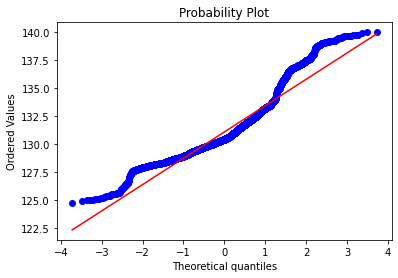

In [88]:
scipy.stats.probplot(df.high,plot=pylab)
pylab.show()

In [89]:
sts.adfuller(df.high)

(-1.2107337359274615,
 0.668961369627366,
 5,
 7037,
 {'1%': -3.431279613044704,
  '5%': -2.8619508146206374,
  '10%': -2.5669886726127307},
 -11196.69958278747)

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

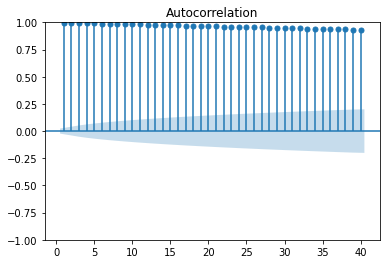

In [91]:
#acf Plot
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.high,lags=40,zero=False)
plt.show()

q = 2 or 3

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


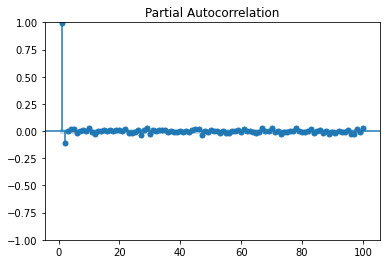

In [92]:
#pacf Plot

sgt.plot_pacf(df.high,lags=100,zero=False)
plt.show()

In [93]:
size= int(len(df)*0.8)
train= df.iloc[:size,:]
test=df.iloc[size:,:]
train

,ticker,open,high,low,close
date,,,,,
16-03-2021 00:00:00,eurjpy,130.1495,130.2730,130.1455,130.2395
16-03-2021 01:00:00,eurjpy,130.2400,130.2885,130.2255,130.2555
16-03-2021 02:00:00,eurjpy,130.2565,130.2645,130.1795,130.2585
16-03-2021 03:00:00,eurjpy,130.2575,130.3075,130.2520,130.2705
16-03-2021 04:00:00,eurjpy,130.2710,130.3405,130.2495,130.3325
...,...,...,...,...,...
14-02-2022 08:00:00,eurjpy,130.8545,130.8800,130.1045,130.1950
14-02-2022 09:00:00,eurjpy,130.1945,130.4155,130.1150,130.1440
14-02-2022 10:00:00,eurjpy,130.1445,130.3860,130.0460,130.2740


In [94]:
import statsmodels.api as sm 
model=sm.tsa.arima.ARIMA(train.high,order=(2,1,2))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

In [95]:
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   high   No. Observations:                 5634
Model:                 ARIMA(2, 1, 2)   Log Likelihood                5925.085
Date:                Thu, 16 Mar 2023   AIC                         -11840.170
Time:                        14:26:11   BIC                         -11806.988
Sample:                             0   HQIC                        -11828.610
                               - 5634                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1553      0.308      0.503      0.615      -0.449       0.760
ar.L2         -0.1947      0.058     -3.356      0.001      -0.308      -0.081
ma.L1          0.0107      0.308      0.035      0.972      -0.594       0.615
ma.L2          0.1721      0.074      2.316      0.021       0.026       0.318
sigma2         0.0071   6.02e-05    118.713      0.000       0.007       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             22093.44
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

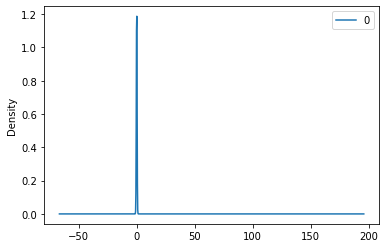

In [96]:
resid= result.resid
re= pd.DataFrame(resid)
re.plot(kind='kde')
plt.show()

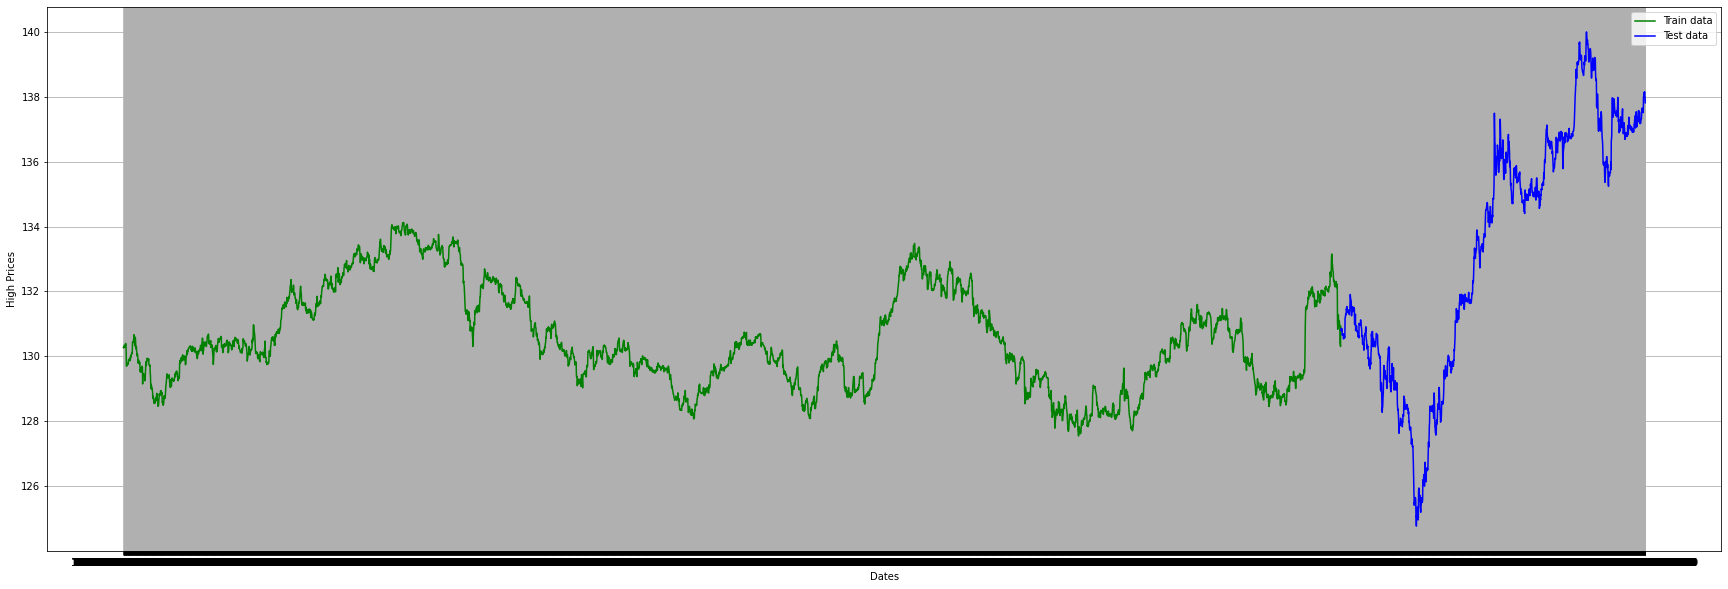

In [97]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('High Prices')
plt.plot(train.high,'green',label='Train data')
plt.plot(test.high,'blue',label='Test data')
plt.legend()
plt.show()

In [98]:
test.high

date
14-02-2022 13:00:00    130.8380
14-02-2022 14:00:00    130.7940
14-02-2022 15:00:00    130.7780
14-02-2022 16:00:00    130.8665
14-02-2022 17:00:00    130.8430
                         ...   
06-05-2022 12:00:00    138.0810
06-05-2022 13:00:00    138.1590
06-05-2022 14:00:00    138.0480
06-05-2022 15:00:00    138.0130
06-05-2022 16:00:00    137.8190
Name: high, Length: 1409, dtype: float64

In [100]:
start= '14-02-2022 13:00:00'
end= '06-05-2022 16:00:00'

In [101]:
history = [x for x in train.high]
pred = list()
for t in range (len(test.high[start:end])):
    model=sm.tsa.arima.ARIMA(history,order=(2,1,2))
    result= model.fit()
    output=result.forecast()
    yhat=output[0]
    pred.append(yhat)
    obs=test.high[t]
    history.append(obs)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

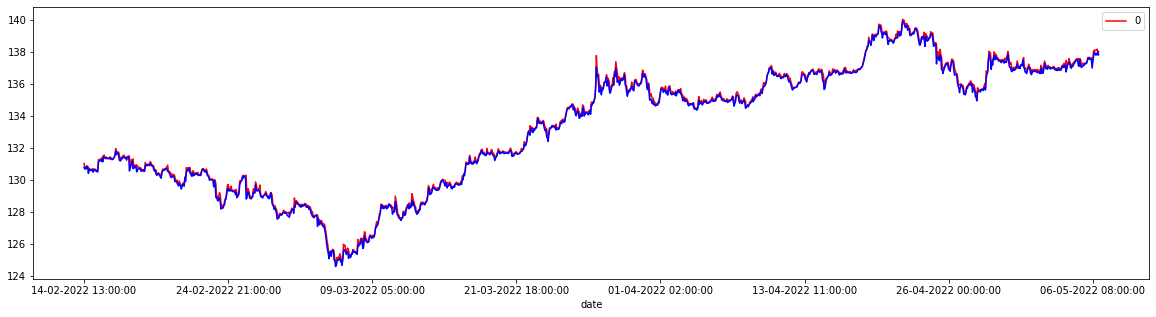

In [102]:
pred= pd.DataFrame(pred,index=test[start:end].index)
pred.plot(figsize=(20,5),c='r')
test.open[start:end].plot(figsize=(20,5),c='b')
plt.show()

In [103]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [104]:
def RMSE (y_true,y_pred):
    mse= mean_squared_error(y_true,y_pred)
    rmse=np.sqrt(mse)
    return rmse

In [105]:
def validation (y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    rmse=RMSE(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    return print(f'R2 Score is : {r2} \n RMSE is: {rmse} \n MEA is : {mae}')

In [106]:
validation(test.open[start:end], pred)

R2 Score is : 0.9977241462002276 
 RMSE is: 0.1824813475266877 
 MEA is : 0.12940919271918008


In [114]:
forecasts = result.forecast(horizon=5)
print(forecasts.variance.values[-1,:])

AttributeError: ignored

# New Section